In [9]:
import slideio
from utils import get_test_images, display_driver_test_image_info 
from utils import show_images, show_image, get_driver_test_images
from utils import show_scene_info, show_scenes, show_volume
from IPython.display import display
import json
import pandas as pd
import random
import json
import matplotlib.pyplot as plt
import numpy as np

# Test images
For the future demonstration of the library, we will be utilizing some test images. Information regarding the images and the drivers required for image processing is stored in the *image.json* file. The helper utility *get_test_images* loads this image information into a list for convenient access and utilization during the demonstration.

In [10]:
images = get_driver_test_images('DCM')
display_driver_test_image_info(images, 'DCM', True)

Image Path,Driver,Options
./images/US-RGB-8-epicard,DCM,"['SINGLE-FRAME', 'JPEG']"
./images/OT-MONO2-8-colon.dcm,DCM,"['SINGLE-FRAME', 'NOT-COMPRESSED']"
./images/SC1_JLSN.dcm,DCM,"['SINGLE-FRAME', 'JLSN']"
./images/CT1_J2KI,DCM,"['SINGLE-FRAME', 'JPEG2000']"
./images/MR-MONO2-8-16x-heart,DCM,['Z-STACK']
./images/GSPS_Liver/DICOMDIR,DCM,"['DICOMDIR', 'Z-STACK']"
./images/BPAEC,DCM,['WSI']
./images/FluorCell_4,DCM,['WSI']
./images/FluorCell_4/3_0,DCM,"['WSI', 'SINGLE-LEVEL']"


# Whole Slide DICOM Images

DICOM Whole Slide Images contain images larger than normal DICOM images. Such images are divided into tiles, with each tile saved as a separate DICOM frame. The Slideio library automatically recognizes these images and seamlessly stitches the tiles together. Typically, a Whole Slide Imaging (WSI) DICOM slide is represented by a folder containing various files. Each file in the folder may represent an original image, an image at a specific zoom level (downsampled image), or an auxiliary image such as a label, macro, overview, etc. The following is an example of the folder structure:

- SLIDE-ID_label.dcm	 
- SLIDE-ID_level-0.dcm
- SLIDE-ID_level-1.dcm
- SLIDE-ID_level-2.dcm
- SLIDE-ID_level-3.dcm
- SLIDE-ID_level-4.dcm
- SLIDE-ID_level-5.dcm
- SLIDE-ID_level-6.dcm
- SLIDE-ID_level-7.dcm
- SLIDE-ID_level-8.dcm
- SLIDE-ID_level-9.dcm
- SLIDE-ID_localizer.dcm
- SLIDE-ID_macro.dcm

This folder contains the original image (SLIDE-ID_level-0.dcm), nine image zoom levels, and three auxiliary images: 'label', 'localizer', and 'macro'. It's important to note that file naming conventions may vary. Slideio extracts file information from DICOM tags and disregards file names.

The recommended method for opening a WSI slide is to pass the folder name to the `open_slide` function. The library will scan all files in the folder, creating a single scene with multiple zoom levels and auxiliary images. The library provides seamless zoom capabilities for the image usinSometimes, zoom pyramid files are not avalable and the only available file is the WSI image at original scale. Such a file can be opened n a WSI DICOM slide by passing a file path to the `open_slide` function. In this case, the library will not search for zoom levels and will use the single file as the image source. However, scaling of the image in this scenario may be slow.D_macro.dcm


### Reading the WSI images
The code below reads WSI DICOM images, creates a list of scenes corresponding to the images, and displays their properties All properties extracted from the slides using slideio library (see `create_scene_info_table` function in `utils.py` file).

In [11]:
wsi_images = [image for image in images if 'WSI' in image['options']]
wsi_scenes = []
for im in wsi_images:
    slide = slideio.open_slide(im['path'],"DCM")
    scene = slide.get_scene(0)
    wsi_scenes.append(scene)
    show_scene_info(scene)

Property,Value
Name,2.25.65969465079325811891707675551046647345
File Path,./images/BPAEC
"Size (Width, Height)","(12288, 9216)"
Number of Channels,1
Compression,Compression.Jpeg
Data Type,uint8
Magnification,0.0
Resolution,"(0.0, 0.0)"
Z-Resolution,0.0
Time Resolution,0.0


Property,Value
Name,2.25.83282858720704132758110891374375550907
File Path,./images/FluorCell_4
"Size (Width, Height)","(11264, 11264)"
Number of Channels,1
Compression,Compression.Jpeg
Data Type,uint8
Magnification,0.0
Resolution,"(0.0, 0.0)"
Z-Resolution,0.0
Time Resolution,0.0


Property,Value
Name,2.25.83282858720704132758110891374375550907
File Path,./images/FluorCell_4/3_0
"Size (Width, Height)","(11264, 11264)"
Number of Channels,1
Compression,Compression.Jpeg
Data Type,uint8
Magnification,0.0
Resolution,"(0.0, 0.0)"
Z-Resolution,0.0
Time Resolution,0.0


## Reading of the whole image
The code below iterates through the scene list and displays the downsampled image. To read the image, the following code snippet is used (simplified; for details, refer to the `show_scenes` function in `utils.py`):

```python
downscale = 10.
scene_rect = scene.rect
image_size = (scene_rect[2], 0)
image = scene.read_block(scene_rect, size=image_siz)
```

Please note that in the definition of size, the height is set to 0. In this case, the library calculates the size of the downsampled image based on the specified width while maintaining the same scale in the x and y directions.

Number of scenes: 3


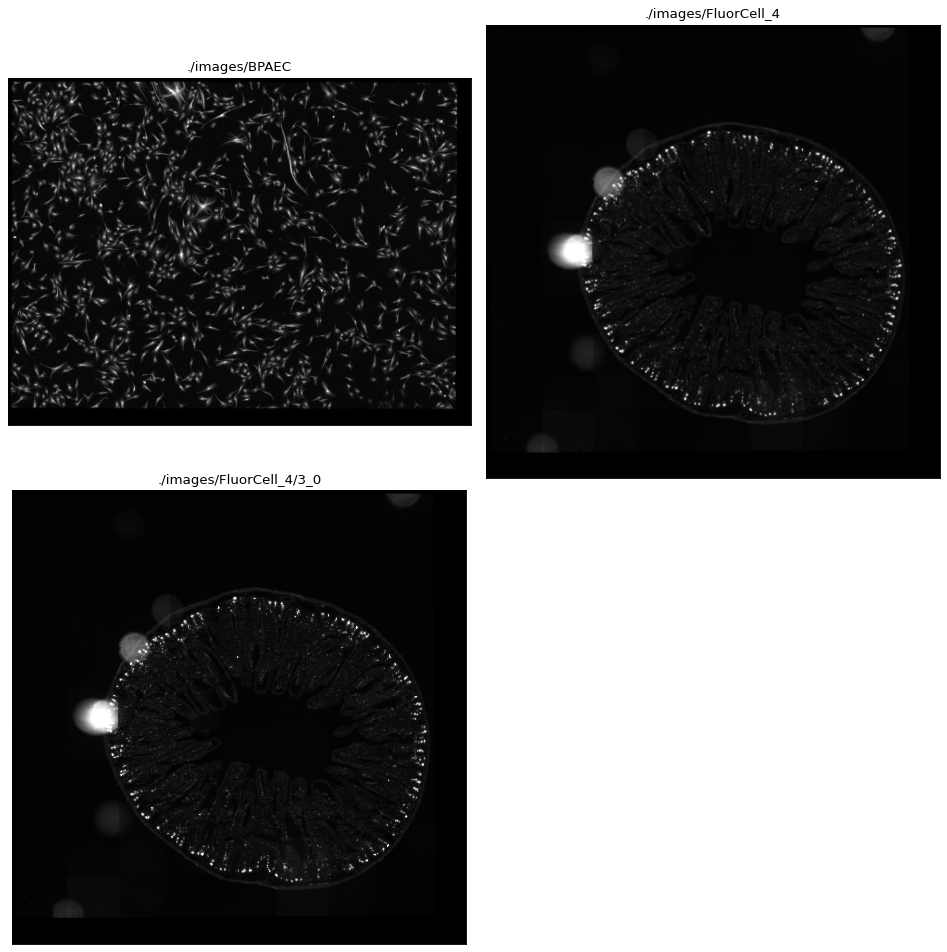

In [12]:
show_scenes(wsi_scenes, 2, (500,500))

## Tile reading
The code below reads random tiles from the random WSI scenes, saves them to a list and renders the images.

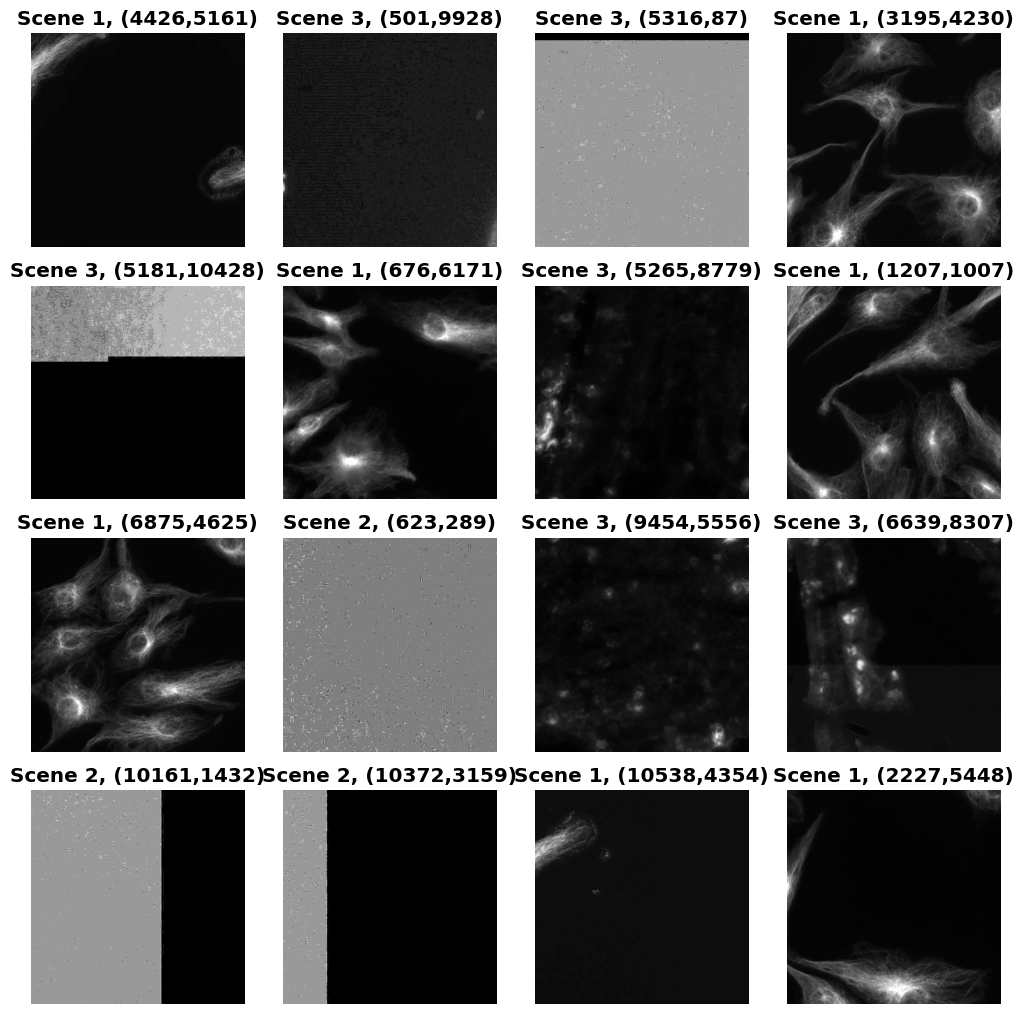

In [13]:
tile_size = (500,500)
num_scenes = len(wsi_scenes)
tiles = []
titles = []
for tile in range (16):
    scene_index = random.randint(0,num_scenes-1)
    scene = wsi_scenes[scene_index]
    scene_size = scene.size
    x = random.randint(0, scene_size[0]-tile_size[0]-1)
    y = random.randint(0, scene_size[1]-tile_size[1]-1)
    rect = (x, y, tile_size[0],tile_size[1])
    tile_img = scene.read_block(rect)
    tiles.append(tile_img)
    titles.append(f"Scene {scene_index+1}, ({x},{y})")
show_images(tiles,titles,256)

The code below reads random tiles with size 1000x1000, downsamples the to 256x256, and renders them.

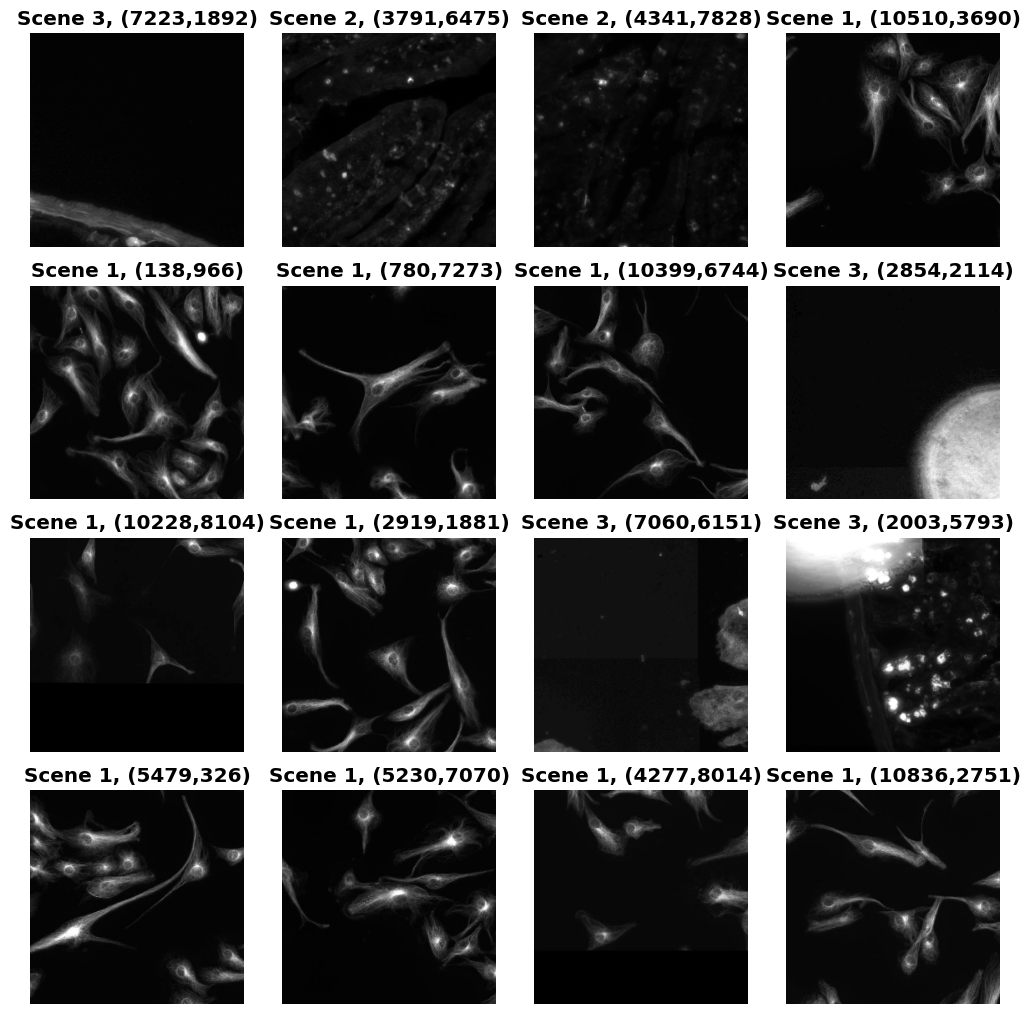

In [14]:
tile_size = (1000,1000)
scale_to = (256, 256)
num_scenes = len(wsi_scenes)
tiles = []
titles = []
for tile in range (16):
    scene_index = random.randint(0,num_scenes-1)
    scene = wsi_scenes[scene_index]
    scene_size = scene.size
    x = random.randint(0, scene_size[0]-tile_size[0]-1)
    y = random.randint(0, scene_size[1]-tile_size[1]-1)
    rect = (x, y, tile_size[0],tile_size[1])
    tile_img = scene.read_block(rect, size=scale_to)
    tiles.append(tile_img)
    titles.append(f"Scene {scene_index+1}, ({x},{y})")
show_images(tiles,titles,256)

## Auxiliary images

In [15]:
wsi_scenes[0].get_aux_image_names()

['LABEL']

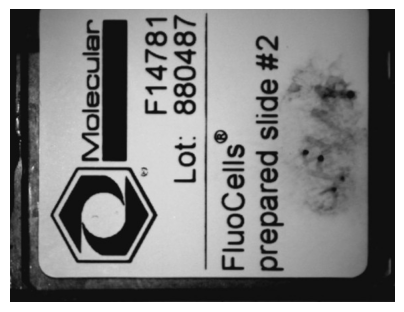

In [16]:
label_img = wsi_scenes[0].get_aux_image('LABEL')
show_image(label_img, 500)